In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#!pip install xgboost
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
#! pip install mlxtend
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('final_data.csv')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Average,satisfaction,type_of_flight
0,70172.0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18.0,3.857143,neutral,<2 hrs
1,5047.0,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,1,6.0,2.285714,dissatisfied,<2 hrs
2,110028.0,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0,0.0,3.714286,satisfied,<2 hrs
3,24026.0,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,11,9.0,3.000000,dissatisfied,<2 hrs
4,119299.0,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,3.500000,satisfied,<2 hrs


In [3]:
df.drop(['Average'], axis = 1, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [4]:
df.rename(columns = {'Type of Travel':'Type_of_Travel'}, inplace = True)

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

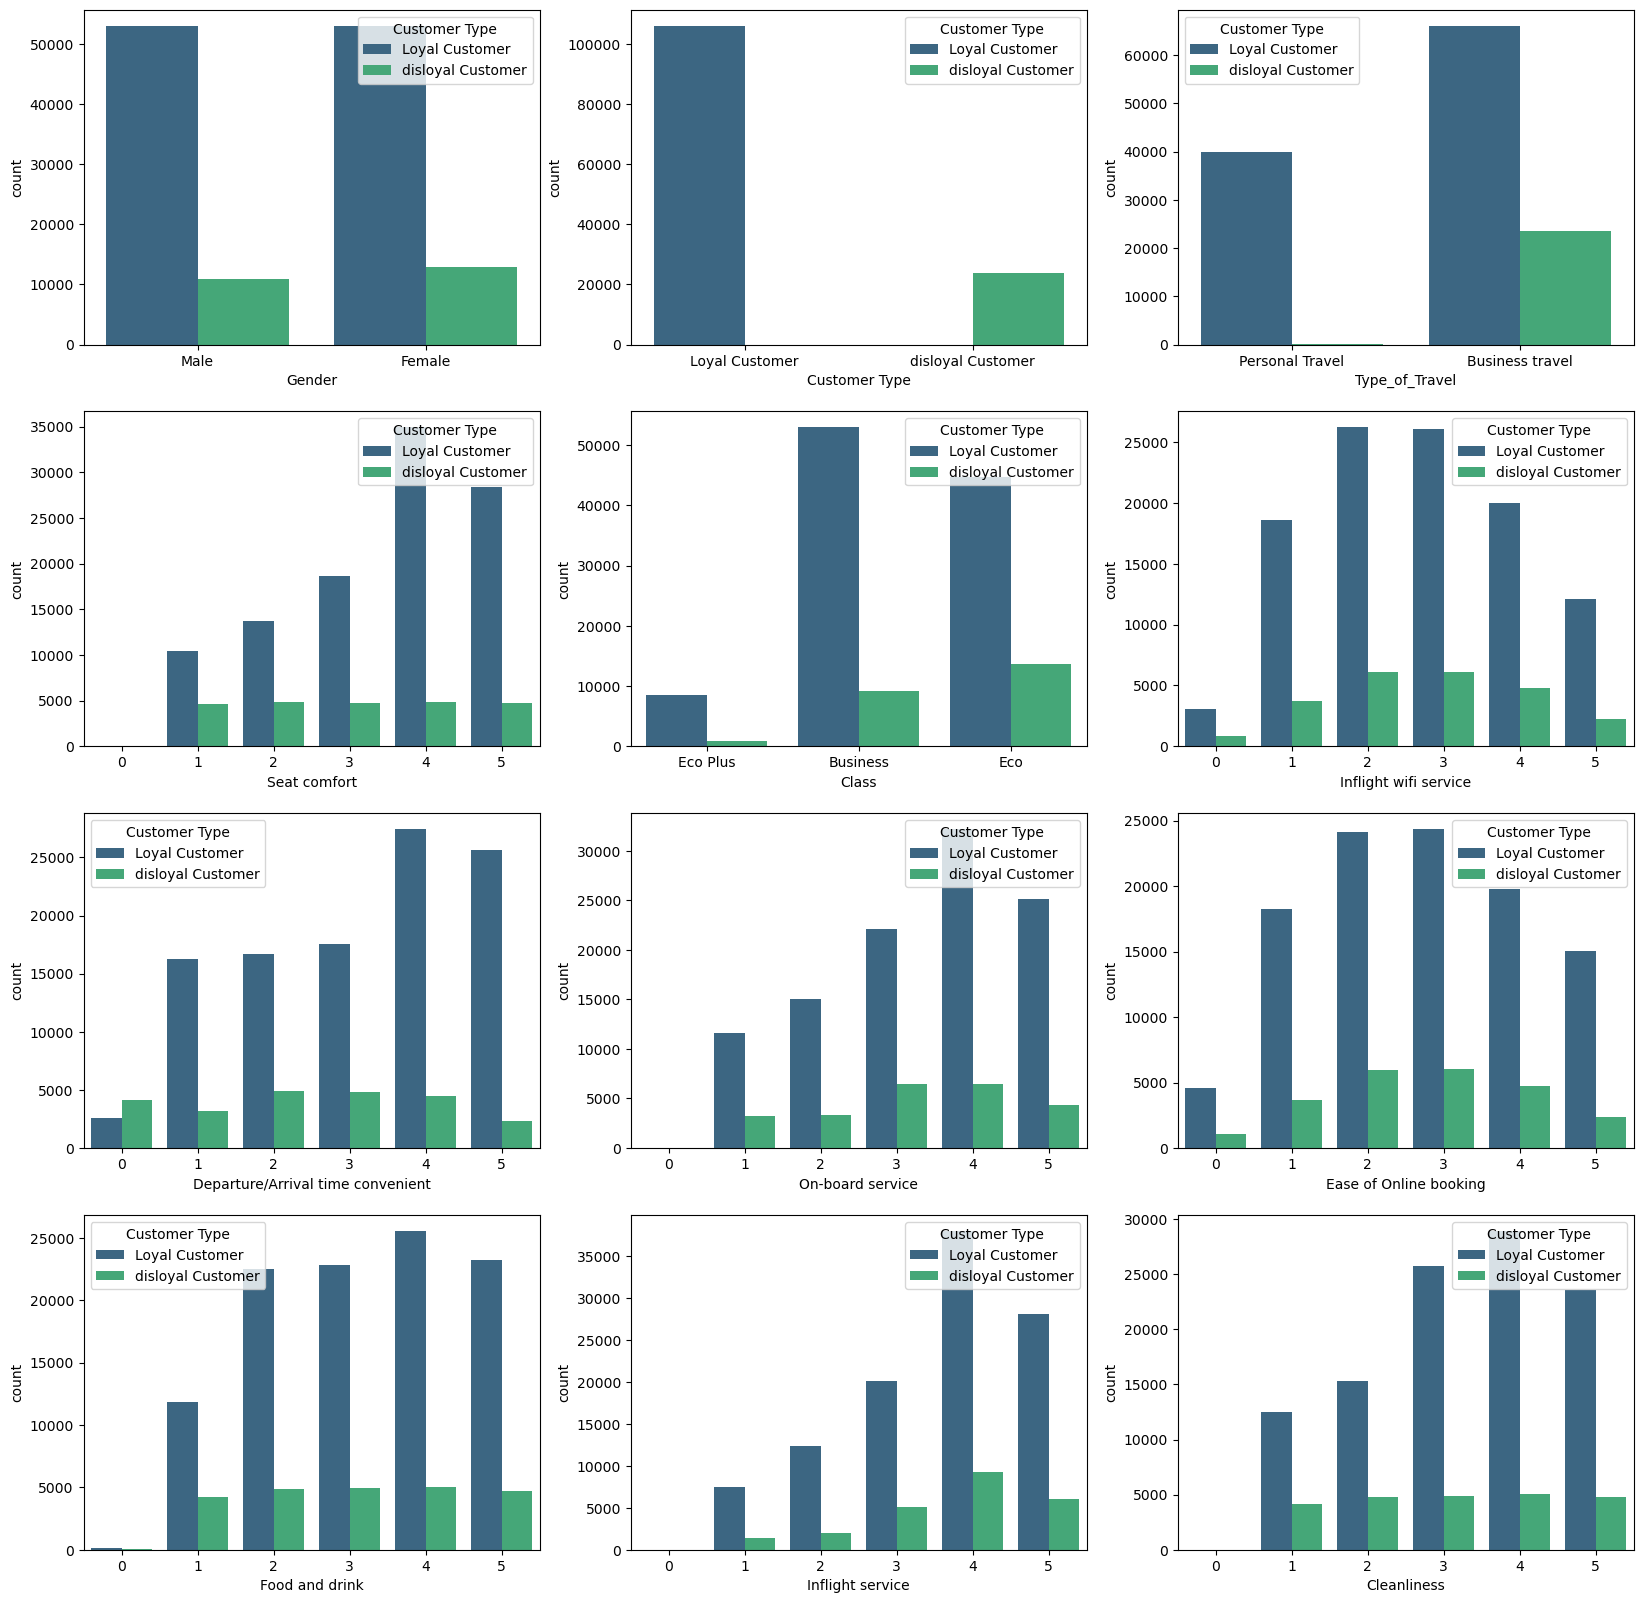

In [5]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = df, hue= 'Customer Type', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type_of_Travel', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = df, hue= 'Customer Type',  palette= 'viridis', ax = axes[3, 2])

### Business Travel

In [6]:
df2 = df[(df.Type_of_Travel == "Business travel")]
df2.head()

,Gender,Customer Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type_of_flight
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,dissatisfied,<2 hrs
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,<2 hrs
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,dissatisfied,<2 hrs
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,<2 hrs
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,4,5,4,4,0.0,satisfied,>2 hrs


In [7]:
df2['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
df2['satisfaction'].replace({'neutral': 0, 'dissatisfied': 1, 'satisfied': 2},inplace = True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89693 entries, 1 to 129878
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             89693 non-null  int64  
 1   Customer Type                      89693 non-null  object 
 2   Age                                89693 non-null  int64  
 3   Type_of_Travel                     89693 non-null  object 
 4   Class                              89693 non-null  object 
 5   Flight Distance                    89693 non-null  int64  
 6   Inflight wifi service              89693 non-null  int64  
 7   Departure/Arrival time convenient  89693 non-null  int64  
 8   Ease of Online booking             89693 non-null  int64  
 9   Gate location                      89693 non-null  int64  
 10  Food and drink                     89693 non-null  int64  
 11  Online boarding                    89693 non-null  in

<AxesSubplot:xlabel='type_of_flight', ylabel='count'>

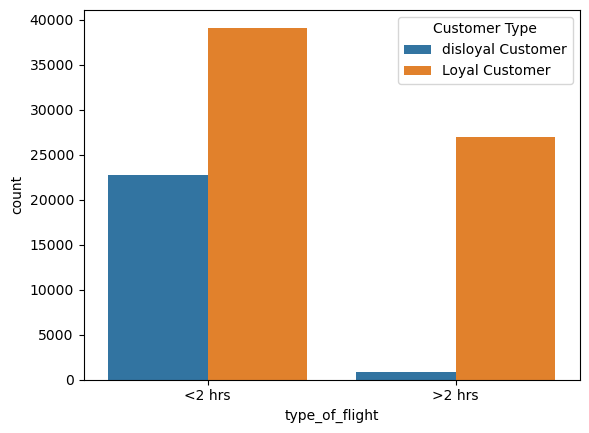

In [9]:
sns.countplot(x = 'type_of_flight', hue = 'Customer Type', data = df2)

### Short Flights (<2 hrs)

In [10]:
df2 = df2[(df2.type_of_flight == '<2 hrs')]
df2.head()

,Gender,Customer Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type_of_flight
1,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,1,<2 hrs
2,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,2,<2 hrs
3,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,1,<2 hrs
4,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,2,<2 hrs
8,1,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,2,1,4,1,2,0,0.0,1,<2 hrs


In [11]:
df2['Arrival Delay in Minutes'].fillna(df2['Arrival Delay in Minutes'].mean(), inplace = True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61877 entries, 1 to 129878
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             61877 non-null  int64  
 1   Customer Type                      61877 non-null  object 
 2   Age                                61877 non-null  int64  
 3   Type_of_Travel                     61877 non-null  object 
 4   Class                              61877 non-null  object 
 5   Flight Distance                    61877 non-null  int64  
 6   Inflight wifi service              61877 non-null  int64  
 7   Departure/Arrival time convenient  61877 non-null  int64  
 8   Ease of Online booking             61877 non-null  int64  
 9   Gate location                      61877 non-null  int64  
 10  Food and drink                     61877 non-null  int64  
 11  Online boarding                    61877 non-null  in

### Eco Class

In [13]:
df2 = df2[(df2.Class == 'Eco')]
df2.head()

,Gender,Customer Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type_of_flight
9,0,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,3,4,4,3,2,0,0.0,1,<2 hrs
10,1,disloyal Customer,24,Business travel,Eco,1182,4,5,5,4,...,3,3,5,3,5,2,0,0.0,0,<2 hrs
12,0,Loyal Customer,53,Business travel,Eco,834,1,4,4,4,...,1,1,3,4,4,1,28,8.0,1,<2 hrs
15,0,disloyal Customer,13,Business travel,Eco,486,2,1,2,3,...,2,1,4,1,3,4,1,0.0,1,<2 hrs
20,0,Loyal Customer,9,Business travel,Eco,1174,2,4,2,4,...,1,5,3,4,3,2,0,4.0,1,<2 hrs


<AxesSubplot:xlabel='type_of_flight', ylabel='count'>

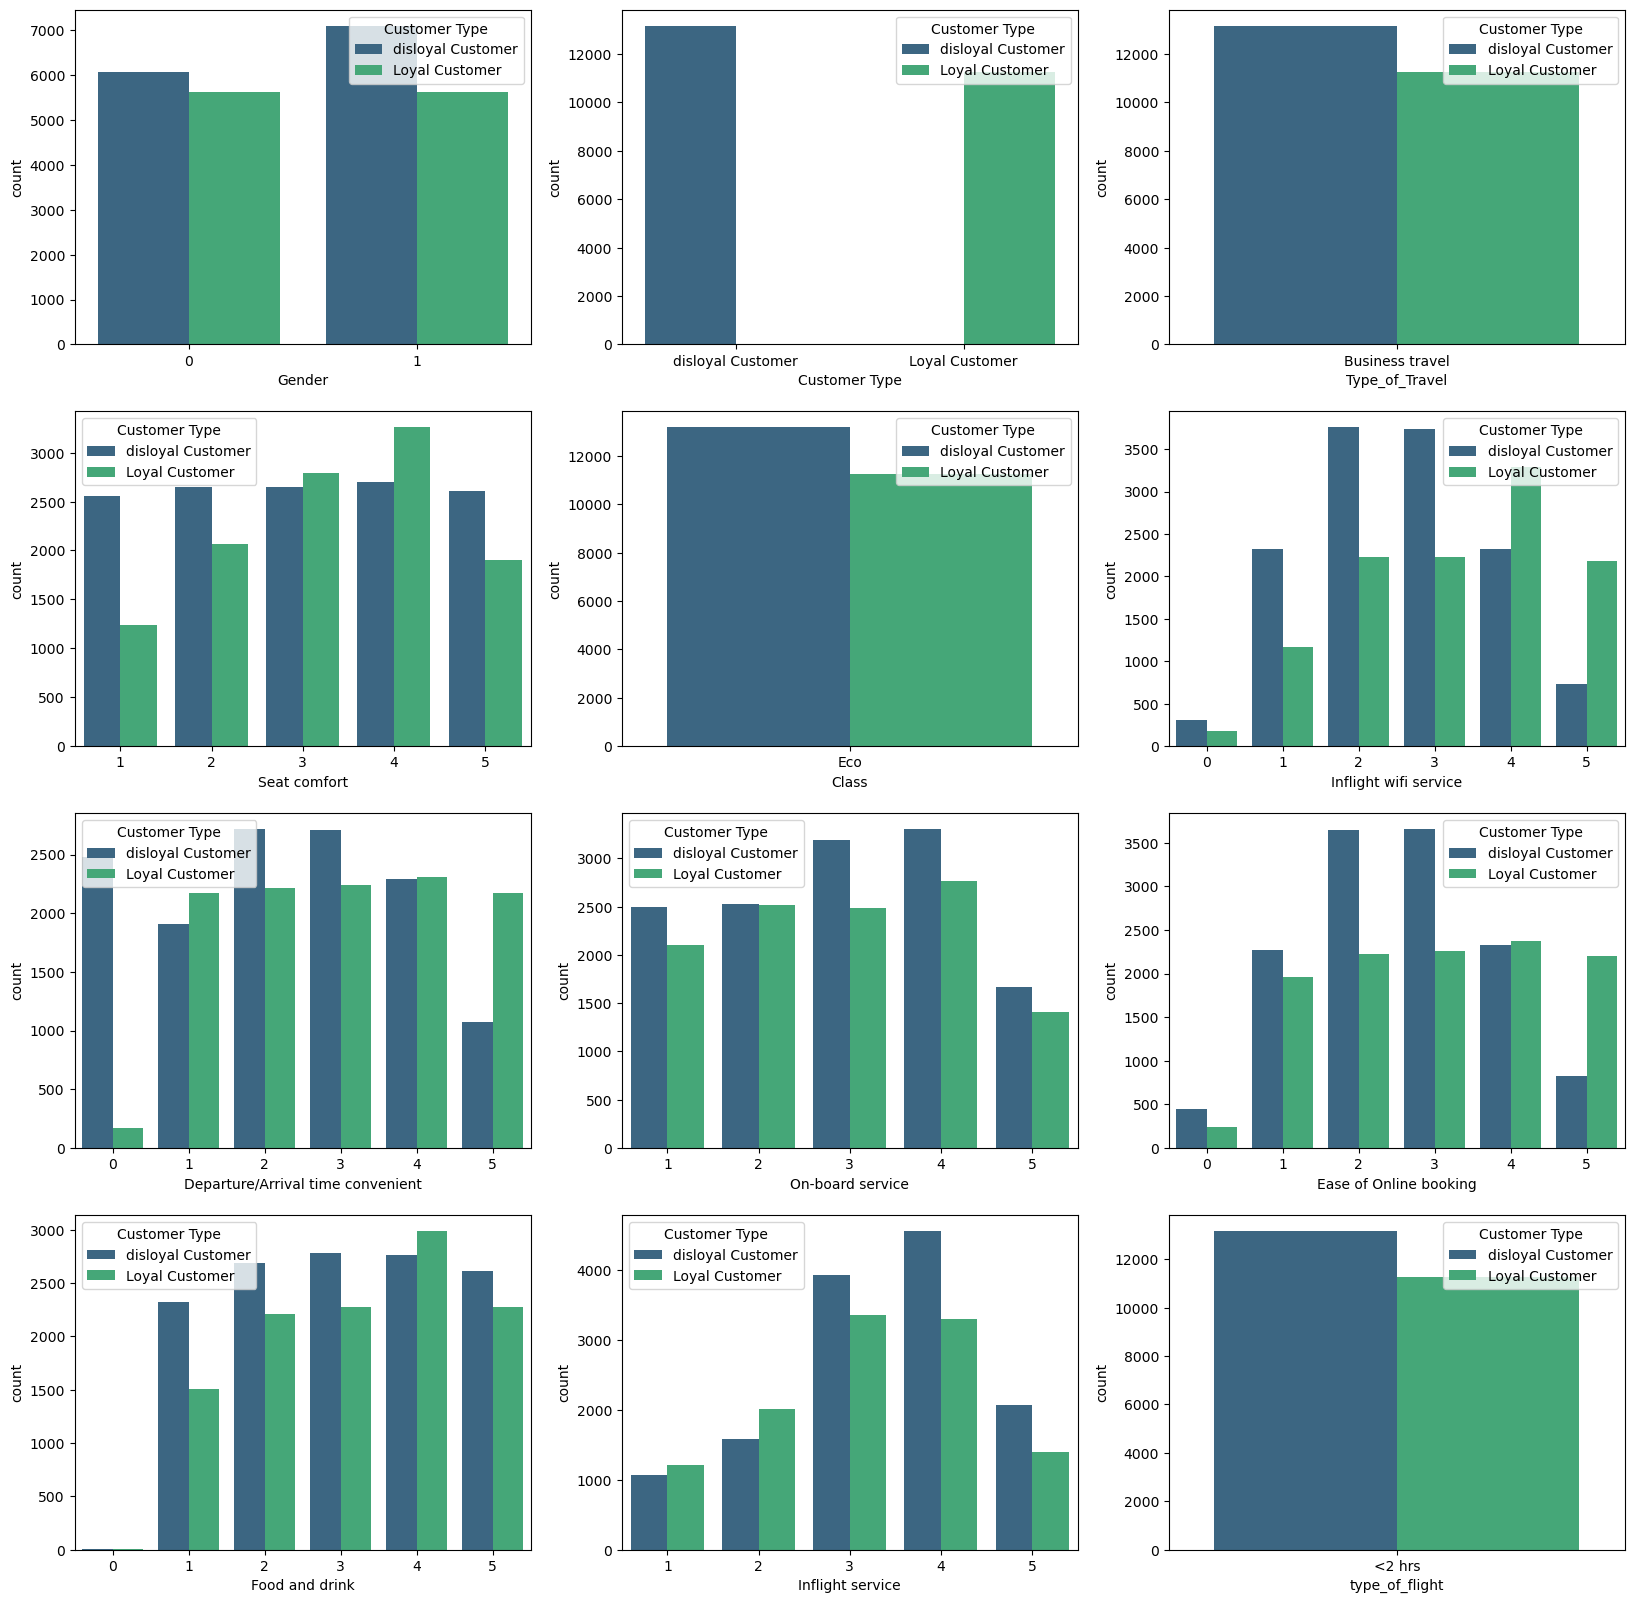

In [14]:
fig, axes = plt.subplots(4, 3 , figsize = (20,20))
sns.countplot(x = 'Gender', data = df2, hue= 'Customer Type', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type_of_Travel', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'type_of_flight', data = df2, hue= 'Customer Type',  palette= 'viridis', ax = axes[3, 2])

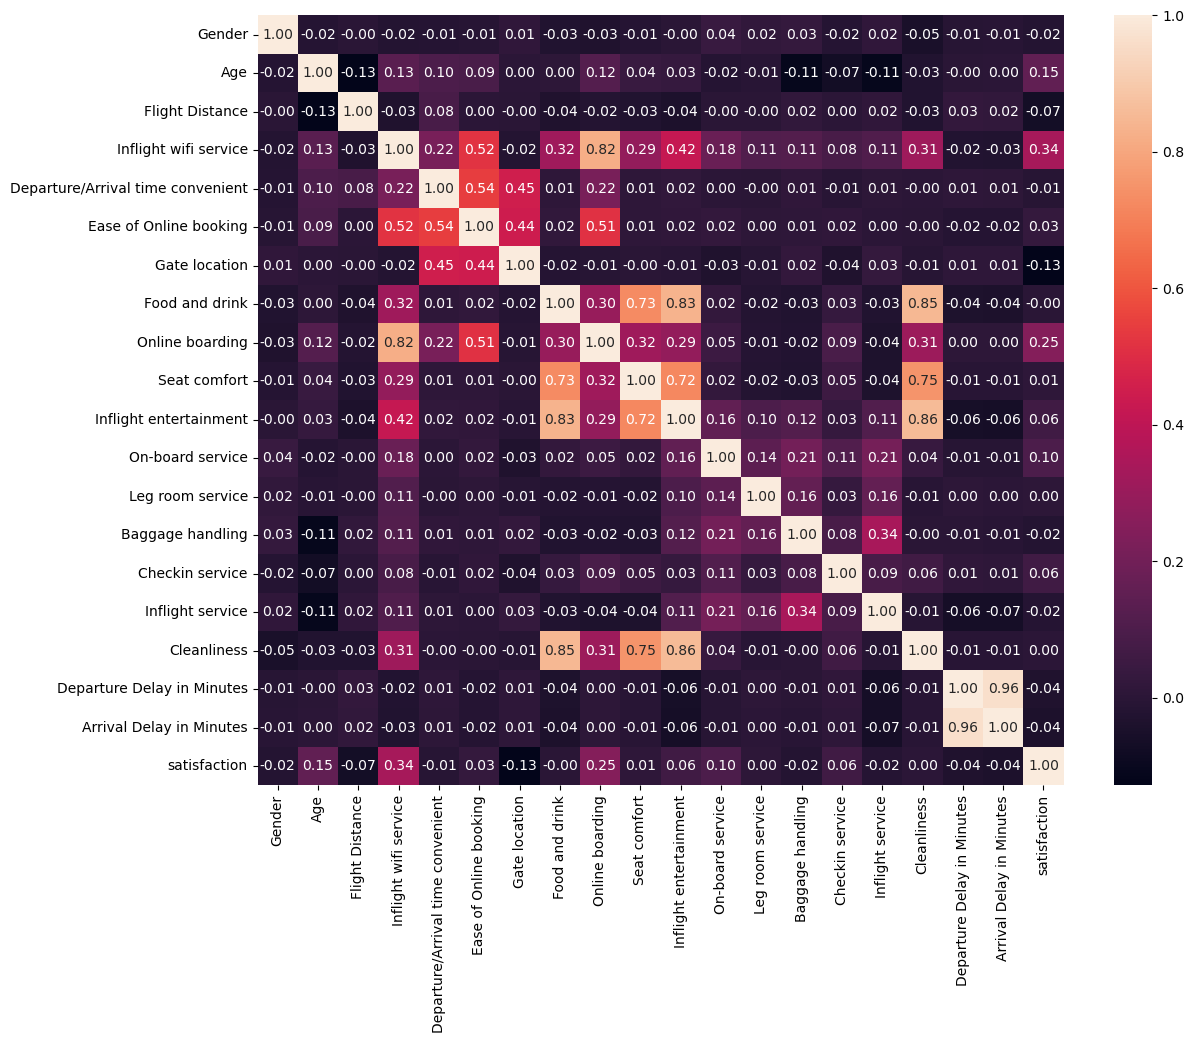

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.corr(), annot=True, fmt='.2f')
plt.show()

In [16]:
df2.reset_index(inplace = True)
df2.head()

,index,Gender,Customer Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type_of_flight
0,9,0,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,3,4,4,3,2,0,0.0,1,<2 hrs
1,10,1,disloyal Customer,24,Business travel,Eco,1182,4,5,5,...,3,3,5,3,5,2,0,0.0,0,<2 hrs
2,12,0,Loyal Customer,53,Business travel,Eco,834,1,4,4,...,1,1,3,4,4,1,28,8.0,1,<2 hrs
3,15,0,disloyal Customer,13,Business travel,Eco,486,2,1,2,...,2,1,4,1,3,4,1,0.0,1,<2 hrs
4,20,0,Loyal Customer,9,Business travel,Eco,1174,2,4,2,...,1,5,3,4,3,2,0,4.0,1,<2 hrs


In [17]:
df2.drop('index', axis = 1, inplace = True)
df2.drop('Flight Distance', axis = 1, inplace = True)
df2.head()

,Gender,Customer Type,Age,Type_of_Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type_of_flight
0,0,disloyal Customer,20,Business travel,Eco,3,3,3,4,2,...,2,3,4,4,3,2,0,0.0,1,<2 hrs
1,1,disloyal Customer,24,Business travel,Eco,4,5,5,4,2,...,3,3,5,3,5,2,0,0.0,0,<2 hrs
2,0,Loyal Customer,53,Business travel,Eco,1,4,4,4,1,...,1,1,3,4,4,1,28,8.0,1,<2 hrs
3,0,disloyal Customer,13,Business travel,Eco,2,1,2,3,4,...,2,1,4,1,3,4,1,0.0,1,<2 hrs
4,0,Loyal Customer,9,Business travel,Eco,2,4,2,4,2,...,1,5,3,4,3,2,0,4.0,1,<2 hrs


In [18]:
df2.drop('type_of_flight', axis = 1, inplace = True)
df2.drop('Type_of_Travel', axis = 1, inplace = True)
df2.drop('Class', axis = 1, inplace = True)
df2.head()

,Gender,Customer Type,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,disloyal Customer,20,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,1
1,1,disloyal Customer,24,4,5,5,4,2,5,2,2,3,3,5,3,5,2,0,0.0,0
2,0,Loyal Customer,53,1,4,4,4,1,1,1,1,1,1,3,4,4,1,28,8.0,1
3,0,disloyal Customer,13,2,1,2,3,4,2,1,4,2,1,4,1,3,4,1,0.0,1
4,0,Loyal Customer,9,2,4,2,4,2,2,1,2,1,5,3,4,3,2,0,4.0,1


### Feature Selection

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Separate the target variable and features
X = df2.drop('Customer Type', axis=1)
y = df2['Customer Type']

# Define the model
model = LogisticRegression()

# Define the RFE algorithm with cross-validation
rfe = RFE(model, n_features_to_select=5, step=1)

# Fit the RFE algorithm to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features)

Index(['Departure/Arrival time convenient', 'Inflight entertainment',
       'Baggage handling', 'Cleanliness', 'satisfaction'],
      dtype='object')


In [20]:
X = df2.drop('Customer Type', axis=1)
y = df2['Customer Type']
# Apply chi-square feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

Index(['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Online boarding', 'satisfaction'],
      dtype='object')


In [21]:
X = df2.drop('Customer Type', axis=1)
y = df2['Customer Type']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Age', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'satisfaction']
[0.00963895 0.29000976 0.0664626  0.08905539 0.10777203 0.06285297
 0.02644216 0.05262276 0.03138718 0.04888969 0.01582624 0.0137793
 0.02225525 0.01466198 0.02212292 0.033928   0.01302505 0.01422557
 0.06504222]


In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df2.drop('Customer Type', axis=1)
y = df2['Customer Type']
# Apply information gain feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

Index(['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Gate location', 'satisfaction'],
      dtype='object')


### Models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
features = ['Age', 'satisfaction', 'Online boarding', 'Gate location',
           'Inflight wifi service', 'Departure/Arrival time convenient']
target = ['Customer Type']

In [25]:
train, test = train_test_split(df2, test_size = 0.3)

In [26]:
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [27]:
train['Customer Type'].replace({'disloyal Customer': 0,'Loyal Customer': 1}, inplace = True)
test['Customer Type'].replace({'disloyal Customer': 0,'Loyal Customer': 1}, inplace = True)

### Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [29]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Predict the classes of the test data using the trained logistic regression model
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.8007908371966185


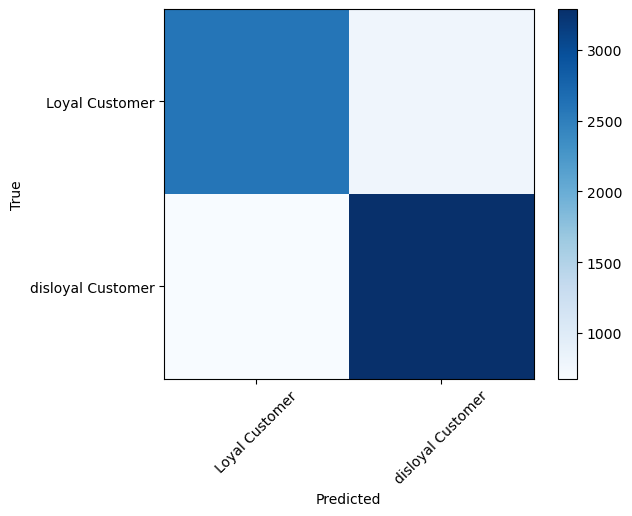

In [30]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of values for the number of estimators and random state
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42, 123, 456]
}

# Create a GridSearchCV object to find the best hyperparameters
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
rfc_grid.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV object
print("Best parameters:", rfc_grid.best_params_)

Best parameters: {'n_estimators': 500, 'random_state': 456}


In [32]:
rfc = RandomForestClassifier(max_depth=16,n_estimators=500, random_state=456)

# Train the model using the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
predictions = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9195527679301881


### SVM

In [33]:
from sklearn.svm import SVC,NuSVC

In [34]:
model = SVC(random_state=456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8346059449140987
